In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
np.random.seed(0)
iters = 1000
m= 100
n = 500
w  = np.random.randn(n)
x_star = np.where(w>0, w, 0)
lam_star = np.where(w<0, w, 0)
nu_star = np.random.randn(m)
A = np.random.randn(m,n)
b = A @ x_star
c = -A.T @ nu_star + lam_star
f_star = c.T @ x_star

In [122]:
F = np.vstack([np.hstack([A, np.zeros((m,m)), np.zeros((m,n))]),
            np.hstack([np.zeros((n,n)), -A.T, np.eye(n)]),
            np.hstack([c.T, b.T, np.zeros(n)])])

g = np.hstack([b, c, 0])

In [123]:
def project_A(F_fac, F, g, z_k):
    """
    F_fac = F.T (F F.T)^{-1}
    F = matrix defining set A
    g = vector defining set A
    z_k = vector to project onto set A
    """
    return z_k - F_fac @ (F @ z_k - g)

def project_C(z_k, n, m):
    """
    z_k = vector to project onto set C
    """
    mult = np.hstack([np.ones(n), np.zeros(n+m)])
    z_k_t = np.multiply(z_k, mult)

    return np.where(z_k_t > 0, z_k_t, 0)

In [128]:
# run alternating projections
z = np.zeros((2*iters, 2*n+m))
F_fac = F.T @ np.linalg.inv(F @ F.T)
for i in range(2*iters-1):
    if i % 2 == 0:
        z[i+1,:] = project_A(F_fac, F, g, z[i,:])
    else:
        z[i+1,:] = project_C(z[i,:], n, m)

z_even = z[::2,:]
z_odd = z[1::2,:]
diff = np.linalg.norm(z_even - z_odd, axis=1, ord=2)

In [125]:
# run alternating projections
z = np.zeros((2*iters, 2*n+m))
z_half = np.zeros((2*iters, 2*n+m)) # also called x
F_fac = F.T @ np.linalg.inv(F @ F.T)
for i in range(2*iters-1):
    if i % 2 == 0:
        z_half[i+1,:] = project_A(F_fac, F, g, z[i,:])
        z[i+1,:] = 2 * z_half[i+1,:] - z[i,:]
    else:
        z_half[i+1,:] = project_C(z[i,:], n, m)
        z[i+1,:] = z[i-1,:] + z_half[i+1,:] - z_half[i-1,:]

z_even = z[::2,:]
z_odd = z[1::2,:]
diff_d = np.linalg.norm(z_even - z_odd, axis=1, ord=2)

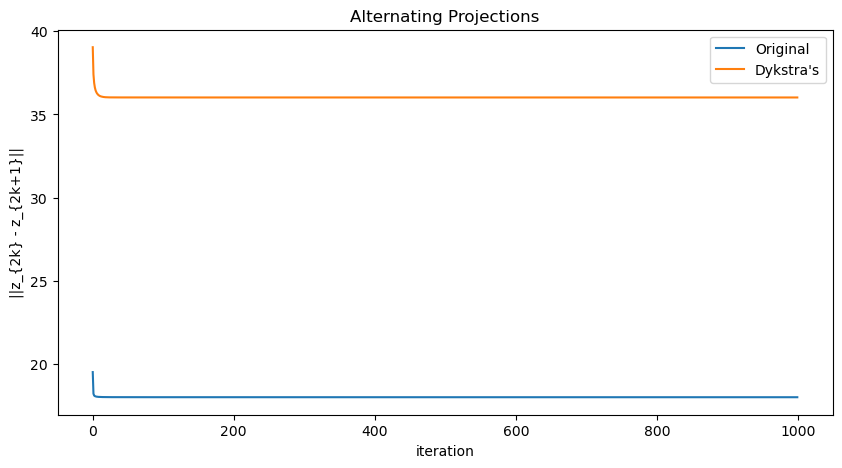

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(diff, label= "Original")
ax.plot(diff_d, label="Dykstra's")
ax.set_xlabel('iteration')
ax.set_ylabel('||z_{2k} - z_{2k+1}||')
ax.set_title('Alternating Projections')
ax.legend()